**Домашнее задание по теме “Обучение с учителем в Scikit-learn”.**

**Задание 1:**

Импортируйте библиотеки pandas и numpy.

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.

Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.

Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.

Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
boston = load_boston()

X = pd.DataFrame(boston.data, columns = boston.feature_names)
Y = pd.DataFrame(boston.target, columns = ['price'])

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [4]:
lr = LinearRegression()

lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)

In [5]:
r2_score(Y_test, Y_pred)

0.7112260057484929

**Задание 2:**

Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.

Сделайте агрумент n_estimators равным 1000, max_depth должен быть равен 12 и random_state сделайте равным 42.

Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression, но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0], чтобы получить из датафрейма одномерный массив Numpy, так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.

Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.

Напишите в комментариях к коду, какая модель в данном случае работает лучше.

In [6]:
from sklearn.ensemble import RandomForestRegressor

In [7]:
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)

In [8]:
model.fit(X_train, Y_train.values[:, 0])
Y_pred = model.predict(X_test)

In [9]:
r2_score(Y_test, Y_pred)

0.87472606157312

Модель RandomForestRegressor работает лучше LinearRegression по результатам сравнения коэффициента r2.

**Задание 3:**

Вызовите документацию для класса RandomForestRegressor, найдите информацию об атрибуте feature_importances_.

С помощью этого атрибута найдите сумму всех показателей важности, установите, какие два признака показывают наибольшую важность.

In [10]:
featureImportance = model.feature_importances_
print('Сумма всех показателей важности = ', np.sum(featureImportance))

Сумма всех показателей важности =  1.0


In [11]:
feature_importance = pd.Series(model.feature_importances_, index = X.columns).sort_values()
feature_importance

CHAS       0.001236
ZN         0.001543
RAD        0.005281
INDUS      0.007138
TAX        0.011525
B          0.012451
NOX        0.014269
AGE        0.014299
PTRATIO    0.018081
CRIM       0.031676
DIS        0.063973
RM         0.402682
LSTAT      0.415847
dtype: float64

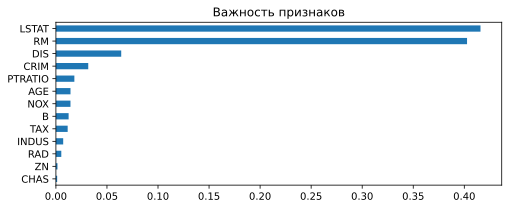

In [12]:
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'svg'

plt.figure(figsize=(8, 3), dpi=80)
feature_importance.plot(kind="barh")
plt.title('Важность признаков')

plt.show()

In [13]:
feature_importance.nlargest(2)

LSTAT    0.415847
RM       0.402682
dtype: float64

Признаки с наибольшей важностью - LSTAT и RM.